In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp



# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"
fig_folder=r"C:\Users\hta031\Github\FEDPROFERENCE\plots\\"

In [3]:
READ_METAFILE= pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\FEDXD_METAFILE.xls" ,sheet_name="METAFILE" )
len(READ_METAFILE)
READ_METAFILE


,MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET,Unnamed: 8
0,FEDXDF1,F,1,FED001_032923_02.CSV,0,MIX,FF,PR,NaN
1,FEDXDF1,F,1,FED001_033023_01.CSV,0,MIX,FR,PR,NaN
2,FEDXDF1,F,1,FED001_040923_00.CSV,1,CAS20,FR,PR,NaN
3,FEDXDF1,F,1,FED002_040923_00.CSV,1,CAS5,FR,PR,NaN
4,FEDXDF1,F,1,FED001_041323_00.CSV,2,CAS20,FR,PR,NaN
5,FEDXDF1,F,1,FED002_041323_00.CSV,2,SUC,FR,PR,NaN
6,FEDXDF1,F,1,FED001_041723_00.CSV,3,CAS5,FR,PR,NaN
7,FEDXDF1,F,1,FED002_041723_00.CSV,3,SUC,FR,PR,NaN
8,FEDXDF1,F,1,FED001_042123_03.CSV,4,CAS5,CE,PR,NaN
9,FEDXDF1,F,1,FED002_042123_02.CSV,4,SUC,CE,PR,NaN


In [3]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED003_041123_00.CSV"))

def tweak_fed(df):
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
             # .loc["2022-09-12 08:00:00":] # cuts off training phase
             .loc[:,"ipi"]
            
           )

            
      
           

In [4]:
DATA_FOLDER = "..\\data"
# df = pd.read_csv(os.path.join(DATA_FOLDER)

def tweak_fed(df):
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
             # .loc["2022-09-12 08:00:00":] # cuts off training phase
             .loc[:,"ipi"]
            
           )

            

In [80]:
# METAFILE = "..\\FEDXD_METAFILE.xls"
# rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

# ff_dict = {}
# for row in rows:
#     # file, mouse, diet, mode, sex,order,epoch = row
#     MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET = row
#     if (MODE == "FR") and (DIET in ["NR", "PR"] and FED_PELLET in ["MIX","CAS5","CAS20","SUC"] and MODE in ["FF","FR","CE"]):
#         key = "_".join([MOUSEID,DIET,FED_PELLET,MODE])
#         ff_dict[key] = {}
#         ff_dict[key]["MOUSEID"] = MOUSEID
#         ff_dict[key]["DIET"] = DIET
#         ff_dict[key]["SEX"] = SEX
#         ff_dict[key]["MODE"] = MODE
#         ff_dict[key]["CHOICE_SESSION"] = CHOICE_SESSION
#         ff_dict[key][BATCH]= BATCH
#         ff_dict[FED_PELLET]= FED_PELLET
#         ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, FEDFILE)))

In [5]:
METAFILE = "..\\FEDXD_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE_SE")

ff_dict = {}
for row in rows:
    # file, mouse, diet, mode, sex,order,epoch = row
    MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET = row
    if (MODE == "FF" or "FR" or "CE") and (DIET in ["NR", "PR"] and FED_PELLET in ["MIX","CAS5","CAS20","SUC"] and CHOICE_SESSION in["ZERO","ONE","TWO","THREE","FOUR"] ):
        key = "_".join([MOUSEID,DIET,FED_PELLET,MODE,CHOICE_SESSION])
        ff_dict[key] = {}
        ff_dict[key]["MOUSEID"] = MOUSEID
        ff_dict[key]["DIET"] = DIET
        ff_dict[key]["SEX"] = SEX
        ff_dict[key]["MODE"] = MODE
        ff_dict[key]["CHOICE_SESSION"] = CHOICE_SESSION
        ff_dict[key][BATCH]= int(BATCH)
        ff_dict[FED_PELLET]= FED_PELLET
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, FEDFILE)))

File is excel file. Making csv metafile first


In [7]:
CHOICE1=ff_dict["FEDXDF1_PR_CAS20_FR_ONE"]["pellets"].head(20)
CHOICE2=ff_dict["FEDXDF1_PR_CAS5_FR_ONE"]["pellets"].head(20)

In [8]:
print(CHOICE1)

t
2023-04-09 09:20:12       NaN
2023-04-09 09:21:09      57.0
2023-04-09 09:34:31     802.0
2023-04-09 10:02:16    1665.0
2023-04-09 10:04:10     114.0
2023-04-09 10:34:45    1835.0
2023-04-09 10:41:01     376.0
2023-04-09 10:50:03     542.0
2023-04-09 10:53:41     217.0
2023-04-09 10:57:40     240.0
2023-04-09 11:04:54     434.0
2023-04-09 11:13:56     542.0
2023-04-09 11:14:34      38.0
2023-04-09 11:26:48     734.0
2023-04-09 11:30:20     212.0
2023-04-09 11:37:50     450.0
2023-04-09 11:51:58     848.0
2023-04-09 11:53:54     116.0
2023-04-09 14:04:08    7814.0
2023-04-09 14:06:13     125.0
Name: ipi, dtype: float64


In [9]:
print(CHOICE2)

t
2023-04-09 09:19:35        NaN
2023-04-09 09:24:41      306.0
2023-04-09 09:38:58      857.0
2023-04-09 10:08:29     1771.0
2023-04-09 10:08:50       21.0
2023-04-09 10:27:07     1097.0
2023-04-09 10:27:35       28.0
2023-04-09 10:37:46      611.0
2023-04-09 11:00:53     1387.0
2023-04-09 11:15:44      891.0
2023-04-09 11:22:06      382.0
2023-04-09 11:41:33     1167.0
2023-04-09 11:53:11      698.0
2023-04-09 11:55:53      162.0
2023-04-09 11:58:57      184.0
2023-04-09 14:03:40     7483.0
2023-04-09 14:17:51      851.0
2023-04-09 17:38:40    12049.0
2023-04-09 19:22:57     6257.0
2023-04-09 20:14:43     3106.0
Name: ipi, dtype: float64


In [382]:
mice=[]
for key in ff_dict.keys():
    
    mouse= key.split("_")[0]
    if mouse not in mice:
        mice.append(mouse)

In [383]:
mice

['FEDXDF1',
 'MIX',
 'CAS20',
 'CAS5',
 'SUC',
 'FEDXDF2',
 'FEDXDF3',
 'FEDXDF4',
 'FEDXDF5',
 'FEDXDF6',
 'FEDXDF7',
 'FEDXDF8',
 'FEDXDF9',
 'FEDXDF10',
 'FEDXDF11',
 'FEDXDF12',
 'FEDXDF13',
 'FEDXDF14',
 'FEDXDF15',
 'FEDXDF16',
 'FEDXDF17',
 'FEDXDF18',
 'FEDXDF19',
 'FEDXDF20',
 'FEDXDM1',
 'FEDXDM2',
 'FEDXDM3',
 'FEDXDM4',
 'FEDXDM5',
 'FEDXDM6',
 'FEDXDM7',
 'FEDXDM8',
 'FEDXDM9',
 'FEDXDM10',
 'FEDXDM11',
 'FEDXDM12',
 'FEDXDM13',
 'FEDXDM14',
 'FEDXDM15',
 'FEDXDM16',
 'FEDXDM17',
 'FEDXDM18',
 'FEDXDM19',
 'FEDXDM20']

In [384]:
ff_dict_all_epochs={}
for mouse in mice:
    ff_dict_all_epochs[mouse]={}
    temp=[]
    for key, val in ff_dict.items():
        if mouse in key:
            temp.append(val["pellets"])
            ff_dict_all_epochs [mouse]["CHOICE_SESSION"]= val["CHOICE_SESSION"]
            
    ff_dict_all_epochs[mouse]["pellets"]=pd.concat(temp)       

TypeError: string indices must be integers

In [4]:
BW_DF=pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\results\FEDXD_CHOICE_RESULTS_OVERALL.xlsx", sheet_name="BODYWEIGHT")

In [5]:
BW_DF.round(decimals=2)

,Mouse,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,BW measuremnt times,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12,AV,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,NaN,19.60,19.00,19.70,20.50,20.70,20.40,20.50,21.50,19.90,21.30,22.50,23.30,22.5,20.31,NaN,NaN,NaN
3,F2,NaN,19.30,19.70,20.60,20.80,20.20,20.40,20.40,21.10,19.20,21.00,21.90,22.70,21.3,20.27,NaN,NaN,NaN
4,F3,NaN,20.40,20.40,21.30,20.90,21.40,20.90,21.80,21.50,19.60,22.70,22.40,22.70,22.8,21.09,NaN,NaN,NaN
5,F4,NaN,20.30,20.10,20.70,20.90,20.60,20.50,20.40,21.30,20.40,21.30,21.90,22.40,21.4,20.65,NaN,NaN,NaN
6,F5,NaN,20.20,19.80,20.00,20.60,20.60,21.10,21.00,21.80,19.40,22.30,22.20,22.50,22.5,20.68,NaN,NaN,NaN
7,F6,NaN,20.10,19.00,20.20,21.10,21.40,21.20,21.30,22.00,22.10,22.00,22.80,23.40,22.1,21.04,NaN,NaN,NaN
8,F7,NaN,18.30,18.30,19.20,19.90,19.90,19.40,19.40,20.50,19.80,20.60,20.60,21.10,20.8,19.53,NaN,NaN,NaN
9,F8,NaN,18.50,18.10,18.90,19.20,19.70,19.50,19.90,20.20,20.40,21.10,21.90,21.40,21.4,19.55,NaN,NaN,NaN


In [6]:
#gets the first 10 measurments of bodyweight for all mice in control and experimental group, male and female
ctl_M=BW_DF.iloc[45:55, 0:13] 
exp_M=BW_DF.iloc[12:22, 0:13]
ctl_F=BW_DF.iloc[35:45, 0:13] 
exp_F=BW_DF.iloc[2:12, 0:13]

ctl_F_B1=BW_DF.iloc[35:40, 2:11] 
exp_F_B1=BW_DF.iloc[2:7, 2:11]

ctl_F_B2=BW_DF.iloc[40:45, 2:11] 
exp_F_B2=BW_DF.iloc[7:12, 2:11]

ctl_M_B3=BW_DF.iloc[45:50, 2:11] 
exp_M_B3=BW_DF.iloc[12:17, 2:11]

ctl_M_B4=BW_DF.iloc[50:55, 2:11] 
exp_M_B4=BW_DF.iloc[17:22, 2:11]

In [7]:
ctl_M

,Mouse,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
45,M11,NaN,22.9,22.5,23.4,23.9,23.8,23.9,23.6,23.8,25.0,25.7,26.9
46,M12,NaN,24.1,24.2,25.8,26.1,25.8,27.0,26.2,26.4,27.5,28.1,28.9
47,M13,NaN,22.2,22.0,22.3,23.4,22.5,23.4,22.5,23.7,25.1,24.3,25.4
48,M14,NaN,23.0,22.9,24.2,24.1,24.1,24.6,24.2,24.0,25.9,25.3,25.4
49,M15,NaN,22.8,22.7,23.7,23.9,23.2,24.0,23.2,23.8,24.0,25.2,25.6
50,M16,NaN,23.7,23.6,24.5,24.8,24.5,25.1,25.3,25.1,25.4,25.9,26.0
51,M17,NaN,23.7,23.6,24.1,24.1,25.0,25.3,25.2,26.0,25.9,26.1,26.4
52,M18,NaN,23.0,22.3,23.4,23.8,23.2,24.0,23.5,24.3,24.5,25.1,25.1
53,M19,NaN,24.7,24.6,25.0,25.2,24.8,24.9,25.5,26.5,25.5,25.9,27.4
54,M20,NaN,22.2,22.0,23.0,23.6,23.3,23.7,24.1,24.5,24.0,24.5,25.4


In [9]:
exp_F_B2

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,20.1,19.0,20.2,21.1,21.4,21.2,21.3,22.0,22.1
8,18.3,18.3,19.2,19.9,19.9,19.4,19.4,20.5,19.8
9,18.5,18.1,18.9,19.2,19.7,19.5,19.9,20.2,20.4
10,19.1,18.6,18.8,19.9,19.5,19.5,19.7,20.3,19.7
11,19.3,18.4,19.6,19.7,19.9,19.9,20.5,20.2,20.2


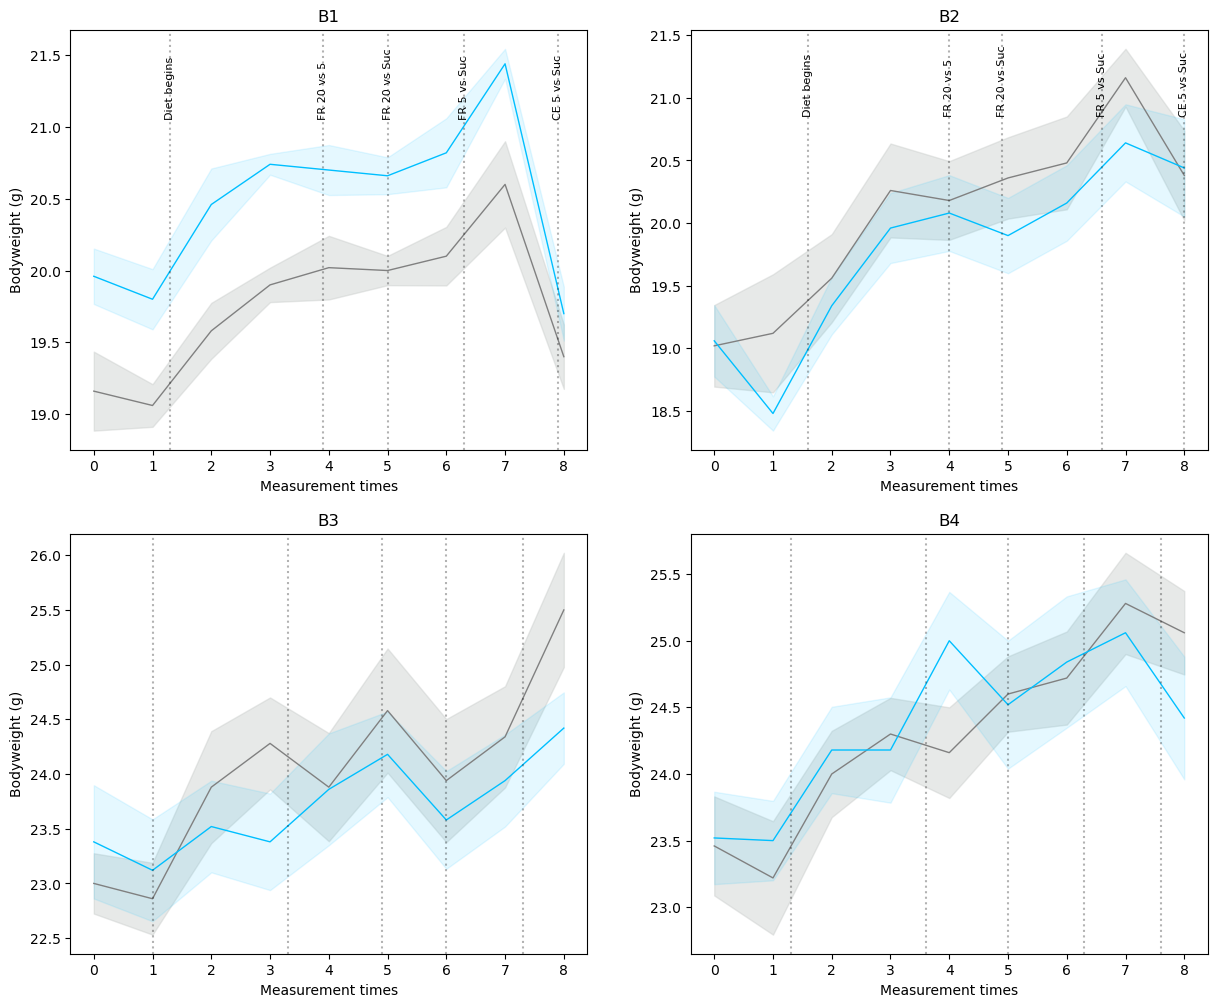

In [158]:
f, axes = plt.subplots(figsize=(13
                                ,12), ncols=2,nrows=2,
                            sharey=False,
                            gridspec_kw={"width_ratios":[0.7,0.7],
                                        "right":1,
                                        
                                        "wspace":0.2,
                                        })
ax1, ax2, ax3, ax4 = axes.flatten()
tp.shadedError(ax1,ctl_F_B1,linecolor=ctl_color)
tp.shadedError(ax1,exp_F_B1,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax1.set_title("B1")

tp.shadedError(ax2,ctl_F_B2,linecolor=ctl_color)
tp.shadedError(ax2,exp_F_B2,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax2.set_title("B2")

tp.shadedError(ax3,ctl_M_B3,linecolor=ctl_color)
tp.shadedError(ax3,exp_M_B3,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax3.set_title("B3")

tp.shadedError(ax4,ctl_M_B4,linecolor=ctl_color)
tp.shadedError(ax4,exp_M_B4,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax4.set_title("B4")


#adds labels
ax1.set_ylabel("Bodyweight (g)")
ax1.set_xlabel("Measurement times")
ax2.set_ylabel("Bodyweight (g)")
ax2.set_xlabel("Measurement times")
ax3.set_ylabel("Bodyweight (g)")
ax3.set_xlabel("Measurement times")
ax4.set_ylabel("Bodyweight (g)")
ax4.set_xlabel("Measurement times")


#adds vertical dashed lines to each plot
vertical_offset = 2.3
ax1.axvline(1.3,color="k",linestyle=":", alpha= 0.3)
ax1.text(1.3, ax1.get_ylim()[0] + vertical_offset, 'Diet begins', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax1.axvline(3.9,color="k",linestyle=":", alpha= 0.3)
ax1.text(3.9, ax1.get_ylim()[0] + vertical_offset, 'FR 20 vs 5', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax1.axvline(5,color="k",linestyle=":", alpha= 0.3)
ax1.text(5, ax1.get_ylim()[0] + vertical_offset, 'FR 20 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax1.axvline(6.3,color="k",linestyle=":", alpha= 0.3)
ax1.text(6.3, ax1.get_ylim()[0] + vertical_offset, 'FR 5 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax1.axvline(7.9,color="k",linestyle=":", alpha= 0.3)
ax1.text(7.9, ax1.get_ylim()[0] + vertical_offset, 'CE 5 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)

vertical_offset_2 = 2.1
ax2.axvline(1.6,color="k",linestyle=":", alpha= 0.3)
ax2.text(1.6, ax1.get_ylim()[0] + vertical_offset_2, 'Diet begins', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax2.axvline(4,color="k",linestyle=":", alpha= 0.3)
ax2.text(4, ax1.get_ylim()[0] + vertical_offset_2, 'FR 20 vs 5', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax2.axvline(4.9,color="k",linestyle=":", alpha= 0.3)
ax2.text(4.9, ax1.get_ylim()[0] + vertical_offset_2, 'FR 20 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax2.axvline(6.6,color="k",linestyle=":", alpha= 0.3)
ax2.text(6.6, ax1.get_ylim()[0] + vertical_offset_2, 'FR 5 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)
ax2.axvline(8,color="k",linestyle=":", alpha= 0.3)
ax2.text(8, ax1.get_ylim()[0] + vertical_offset_2, 'CE 5 vs Suc', va='bottom', ha='center', rotation="vertical",color='k', fontsize=8)


ax3.axvline(1,color="k",linestyle=":", alpha= 0.3)
ax3.axvline(3.3,color="k",linestyle=":", alpha= 0.3)
ax3.axvline(4.9,color="k",linestyle=":", alpha= 0.3)
ax3.axvline(6,color="k",linestyle=":", alpha= 0.3)
ax3.axvline(7.3,color="k",linestyle=":", alpha= 0.3)

ax4.axvline(1.3,color="k",linestyle=":", alpha= 0.3)
ax4.axvline(3.6,color="k",linestyle=":", alpha= 0.3)
ax4.axvline(5,color="k",linestyle=":", alpha= 0.3)
ax4.axvline(6.3,color="k",linestyle=":", alpha= 0.3)
ax4.axvline(7.6,color="k",linestyle=":", alpha= 0.3)

f.savefig(fig_folder + "Bodyweight.pdf")

In [8]:
type(ctl_F_B1)

pandas.core.frame.DataFrame

In [11]:
exp_F_B1

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,19.6,19.0,19.7,20.5,20.7,20.4,20.5,21.5,19.9
3,19.3,19.7,20.6,20.8,20.2,20.4,20.4,21.1,19.2
4,20.4,20.4,21.3,20.9,21.4,20.9,21.8,21.5,19.6
5,20.3,20.1,20.7,20.9,20.6,20.5,20.4,21.3,20.4
6,20.2,19.8,20.0,20.6,20.6,21.1,21.0,21.8,19.4


In [4]:
FOOD_DF=pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\results\FEDXD_CHOICE_RESULTS_OVERALL.xlsx", sheet_name="FOOD_INTAKE")

In [5]:
FOOD_DF

,Mouse,Unnamed: 1,Unnamed: 2,Unnamed: 3,7 days,3 days,3 days.1,3 days.2,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,FW measuremnt times,NaN,NaN,0.00,1.00,2.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,NaN,NaN,NaN,21.90,9.20,9.80,12.10,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,NaN,NaN,NaN,24.50,10.70,11.00,11.50,NaN,NaN,NaN,NaN,NaN,NaN
4,F3,NaN,NaN,NaN,22.90,10.50,10.70,11.10,NaN,NaN,NaN,NaN,NaN,NaN
5,F4,NaN,NaN,NaN,25.10,10.70,10.90,12.80,NaN,NaN,NaN,NaN,NaN,NaN
6,F5,NaN,NaN,NaN,25.70,11.00,11.30,12.40,NaN,NaN,NaN,NaN,NaN,NaN
7,F6,NaN,NaN,NaN,23.80,10.00,10.70,12.50,NaN,NaN,NaN,NaN,NaN,NaN
8,F7,NaN,NaN,NaN,24.20,8.10,10.00,11.60,NaN,NaN,NaN,NaN,NaN,NaN
9,F8,NaN,NaN,NaN,19.90,10.50,10.50,10.40,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
### separates the data of each gruop from the df FOOD_DF.
ctl_M=FOOD_DF.iloc[37:47, 4:8] 
exp_M=FOOD_DF.iloc[12:22, 4:8]
ctl_F=FOOD_DF.iloc[27:37, 4:8] 
exp_F=FOOD_DF.iloc[2:12, 4:8]

In [60]:
exp_F

,7 days,3 days,3 days.1,3 days.2
2,21.9,9.2,9.8,12.1
3,24.5,10.7,11.0,11.5
4,22.9,10.5,10.7,11.1
5,25.1,10.7,10.9,12.8
6,25.7,11.0,11.3,12.4
7,23.8,10.0,10.7,12.5
8,24.2,8.1,10.0,11.6
9,19.9,10.5,10.5,10.4
10,20.7,8.4,9.1,9.6
11,22.3,10.2,10.5,10.4


In [61]:
#get the data of each group based on their batch number

ctl_F_B1=FOOD_DF.iloc[27:32, 4:8] 
exp_F_B1=FOOD_DF.iloc[2:7, 4:8]

ctl_F_B2=FOOD_DF.iloc[32:37, 4:8] 
exp_F_B2=FOOD_DF.iloc[7:12, 4:8] 

ctl_M_B3=FOOD_DF.iloc[37:42, 4:8] 
exp_M_B3=FOOD_DF.iloc[12:17, 4:8]

ctl_M_B4=FOOD_DF.iloc[42:47, 4:8] 
exp_M_B4=FOOD_DF.iloc[17:22, 4:8]

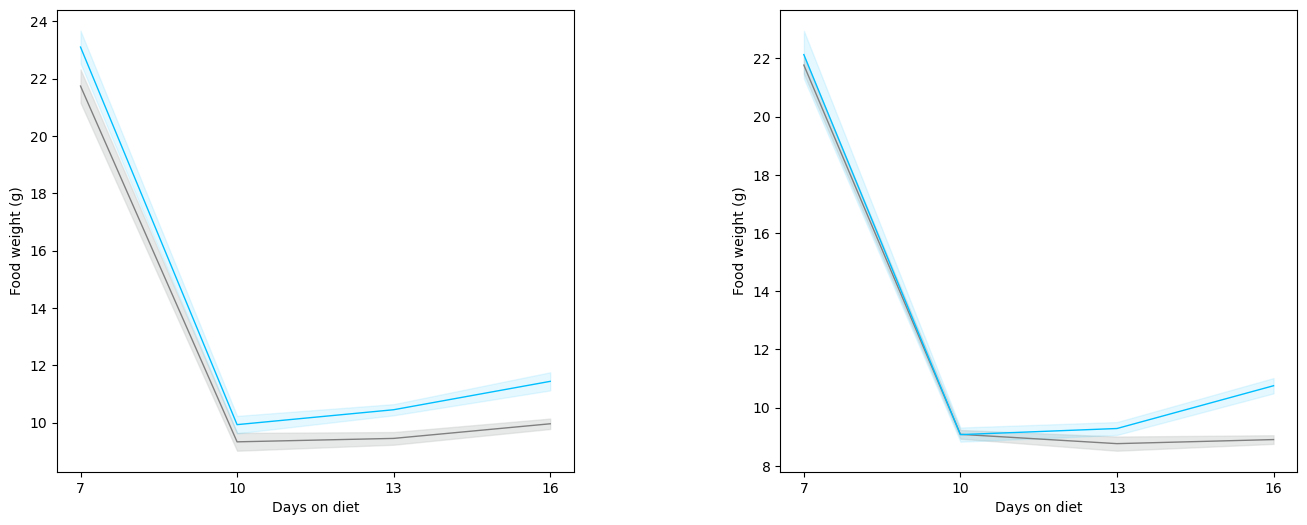

In [75]:
f, [ax1,ax2] = plt.subplots(figsize=(16,6), ncols=2,
                            sharey=False,
                            gridspec_kw={"width_ratios":[0.7,0.7],
                                        "right":0.9, 
                                        "wspace":0.4,
                                        })
tp.shadedError(ax1,ctl_F,linecolor=ctl_color)
tp.shadedError(ax1,exp_F,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
tp.shadedError(ax2,ctl_M,linecolor=ctl_color)
tp.shadedError(ax2,exp_M,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)


#adds labels
ax1.set_ylabel("Food weight (g)")
ax1.set_xlabel("Days on diet")
ax2.set_ylabel("Food weight (g)")
ax2.set_xlabel("Days on diet")


ax1.set_xticks([0,1,2,3],labels=["7","10","13","16"])
ax2.set_xticks([0,1,2,3],labels=["7","10","13","16"])

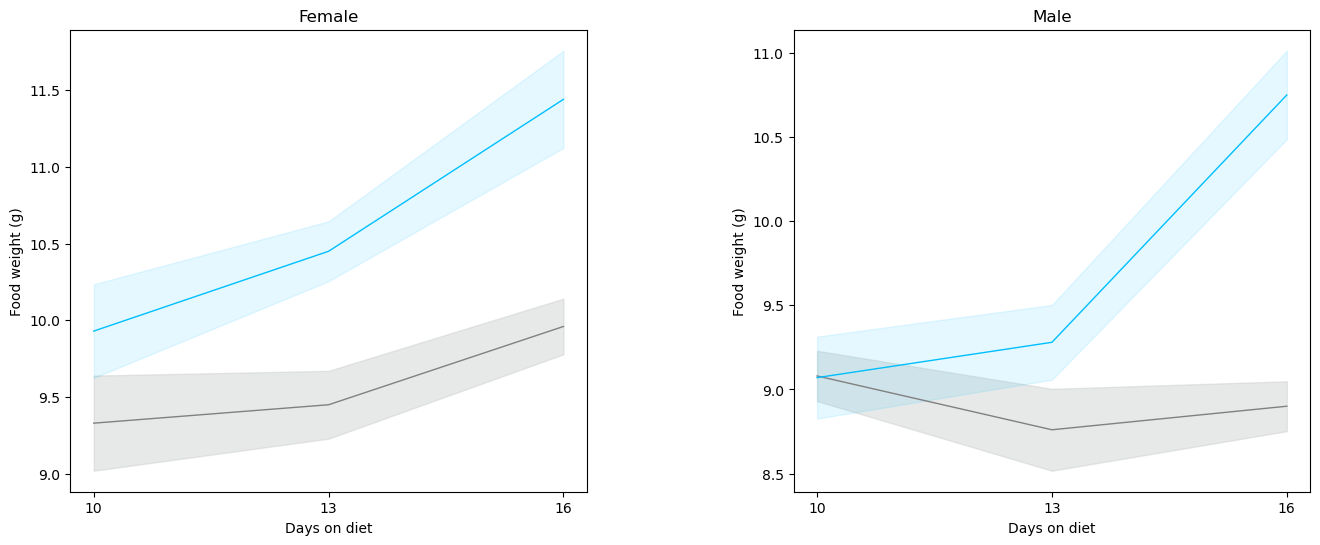

In [84]:
### separates the data of each gruop from the df FOOD_DF.
ctl_M=FOOD_DF.iloc[37:47, 5:8] 
exp_M=FOOD_DF.iloc[12:22, 5:8]
ctl_F=FOOD_DF.iloc[27:37, 5:8] 
exp_F=FOOD_DF.iloc[2:12, 5:8]

f, [ax1,ax2] = plt.subplots(figsize=(16,6), ncols=2,
                            sharey=False,
                            gridspec_kw={"width_ratios":[0.7,0.7],
                                        "right":0.9, 
                                        "wspace":0.4,
                                        })
tp.shadedError(ax1,ctl_F,linecolor=ctl_color)
tp.shadedError(ax1,exp_F,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
tp.shadedError(ax2,ctl_M,linecolor=ctl_color)
tp.shadedError(ax2,exp_M,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)


#adds labels
ax1.set_ylabel("Food weight (g)")
ax1.set_xlabel("Days on diet")
ax2.set_ylabel("Food weight (g)")
ax2.set_xlabel("Days on diet")


ax1.set_xticks([0,1,2,],labels=["10","13","16"])
ax2.set_xticks([0,1,2,],labels=["10","13","16"])


ax1.set_title("Female")
ax2.set_title("Male")

f.savefig(fig_folder+ "Food_intake.pdf")

In [10]:
BC_DF=pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\results\FEDXD_CHOICE_RESULTS_OVERALL.xlsx", sheet_name="BODY_COMPOSITION")

In [42]:
BC_DF=BC_DF.round(decimals=2)

In [86]:
BC_exp_F=BC_DF.iloc[0:10,5:6].transpose() # 5:8 will include lean and bodyweight
BC_exp_M=BC_DF.iloc[0:10,9:10].transpose() # 9:12 includes lean and bodyweight
BC_ctl_F=BC_DF.iloc[15:25,5:6].transpose()
BC_ctl_M=BC_DF.iloc[15:25,9:10].transpose() 

<Axes: >

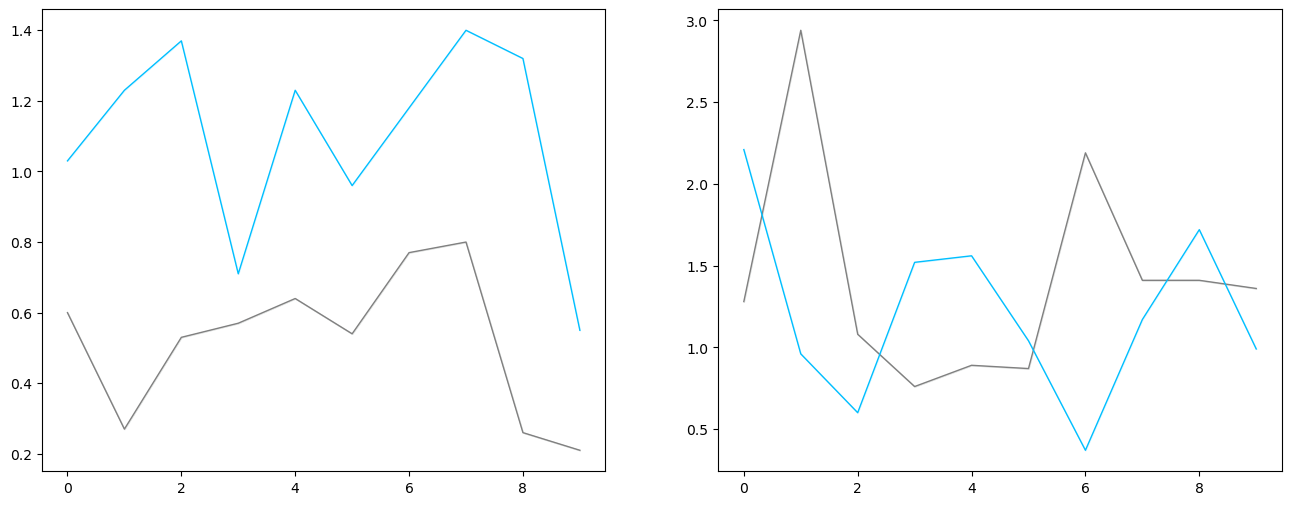

In [87]:
f, [ax,ax2] = plt.subplots(figsize=(16,6), ncols=2)
                            # sharey=False,
                            # gridspec_kw={"width_ratios":[0.7,0.7],
                            #             "right":0.9, 
                            #             "wspace":0.4,
                            #             })
tp.shadedError(ax,BC_ctl_F,linecolor=ctl_color)
tp.shadedError(ax,BC_exp_F,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
tp.shadedError(ax2,BC_ctl_M,linecolor=ctl_color)
tp.shadedError(ax2,BC_exp_M,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)


#adds labels
# ax1.set_ylabel("Food weight (g)")
# ax1.set_xlabel("Days on diet")
# ax2.set_ylabel("Food weight (g)")
# ax2.set_xlabel("Days on diet")


# ax1.set_xticks([0,1,2,],labels=["10","13","16"])
# ax2.set_xticks([0,1,2,],labels=["10","13","16"])


# ax1.set_title("Female")
# ax2.set_title("Male")

#f.savefig(fig_folder+ "Food_intake.pdf")

In [71]:
BC_exp_F=BC_DF.iloc[0:10,5:8].mean()
BC_exp_M=BC_DF.iloc[0:10,9:12].mean()
BC_ctl_F=BC_DF.iloc[15:25,5:8].mean()
BC_ctl_M=BC_DF.iloc[15:25,9:12].mean() 

In [72]:
BC_exp_M

fat.1       1.214
lean.1     22.188
BW(g).1    25.640
dtype: float64

In [76]:
ax.errorbar([BC_exp_F, BC_ctl_F],
            yerr=[BC_exp_F.sem(), BC_ctl_F.sem()],
            marker="o",
            markerfacecolor="white",
             ms=8,
            linestyle="-",
            color=ctl_color,
             label="Ctl",
             
            )

# ax.errorbar([1+spacing,2+spacing,3+spacing],[exp_E1.mean(), exp_E2.mean(), exp_E3.mean()],
#              yerr=[exp_E1.sem(), exp_E2.sem(), exp_E3.sem()],
#             marker="o",
#              markerfacecolor="white",
#              ms=8,
#             linestyle="-",
#             color=exp_color,
#             label="Exp")

TypeError: errorbar() missing 1 required positional argument: 'y'

<Axes: >

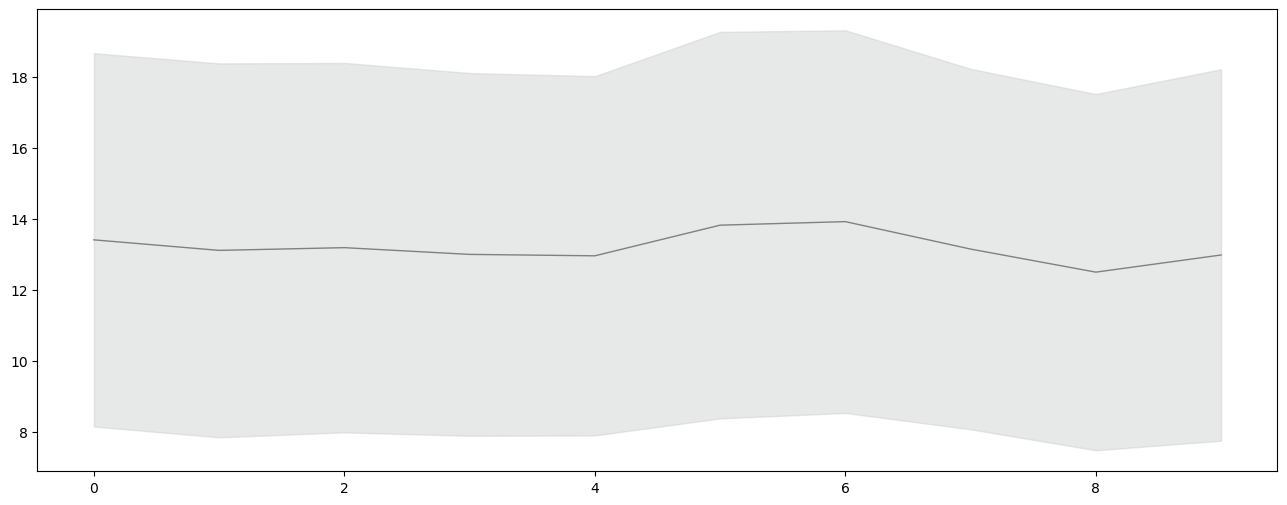

In [63]:
f, ax = plt.subplots(figsize=(16,6))
                            # sharey=False,
                            # gridspec_kw={"width_ratios":[0.7,0.7],
                            #             "right":0.9, 
                            #             "wspace":0.4,
                            #             })
tp.shadedError(ax,BC_ctl_F,linecolor=ctl_color)
# tp.shadedError(ax1,BC_exp_F,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
# tp.shadedError(ax2,BC_ctl_M,linecolor=ctl_color)
# tp.shadedError(ax2,BC_exp_M,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)


#adds labels
# ax1.set_ylabel("Food weight (g)")
# ax1.set_xlabel("Days on diet")
# ax2.set_ylabel("Food weight (g)")
# ax2.set_xlabel("Days on diet")


# ax1.set_xticks([0,1,2,],labels=["10","13","16"])
# ax2.set_xticks([0,1,2,],labels=["10","13","16"])


# ax1.set_title("Female")
# ax2.set_title("Male")

#f.savefig(fig_folder+ "Food_intake.pdf")

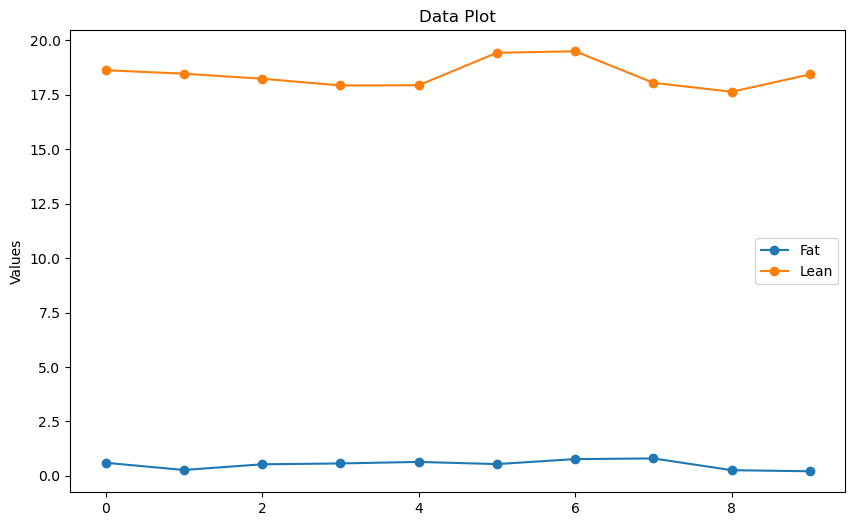

In [66]:


fat_data = [0.60, 0.27, 0.53, 0.57, 0.64, 0.54, 0.77, 0.80, 0.26, 0.21]
lean_data = [18.63, 18.47, 18.24, 17.93, 17.94, 19.43, 19.50, 18.05, 17.64, 18.44]
# bw_data = [21.00, 20.60, 20.80, 20.50, 20.30, 21.50, 21.50, 20.60, 19.60, 20.30]

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot( fat_data, marker='o', label='Fat')
plt.plot( lean_data, marker='o', label='Lean')
# plt.plot( bw_data, marker='o', label='BW(g)')

# Adding labels and title

plt.ylabel('Values')
plt.title('Data Plot')

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [4]:
def get_breakpoints(filename, max_hours=None):

    if max_hours:
        df = get_timerange_from_FEDfile(filename)
    else:
        df = pd.read_csv(filename)

    # works by finding the difference whenever the FR resets
    FR = df["FR"]
    breakpoints = [np.abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]

    return breakpoints

def get_max_pellets(filename, max_hours=None):
    
    if max_hours:
        df = get_timerange_from_FEDfile(filename)
    else:
        df = pd.read_csv(filename)
    
    max_pellets = df["Pellet_Count"].max()

    return max_pellets

def get_timerange_from_FEDfile(filename):

    # formats = ['%Y-%m-%d %H:%M:%S', '%m/%d/%Y %H:%M:%S']

    df = pd.read_csv(filename)

    # try:
    #     tmp_date_time_obj = datetime.strptime(rows[0][0], formats[0])
    #     date_format = formats[0]
    # except ValueError:
    #     tmp_date_time_obj = datetime.strptime(rows[0][0], formats[1])
    #     date_format = formats[1]

    date_format = '%m/%d/%Y %H:%M:%S'
    t0 = datetime.strptime(df["MM:DD:YYYY hh:mm:ss"][0], date_format)

    print(t0)
    
    return t0


filename = "..\\data\\FED001_051522_00.CSV"
df = pd.read_csv(filename)
df.columns
# bps = get_breakpoints(filename)
# # t0 = get_timerange_from_FEDfile(filename)

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\FED001_051522_00.CSV'

In [17]:
# function to get timestamps from fed csv files
metafile = (r"C:\Users\hta031\Github\FEDPROFERENCE\FEDXD_METAFILE.xls")
rows, header = tp.metafilereader(metafile, sheetname="METAFILE")

max_hours = None

mice = {}
for row in rows:
    mouse_id = row[1]
    if mouse_id not in mice.keys():
        mice[mouse_id] = {}
        mice[mouse_id]["sex"] = row[4]
        mice[mouse_id]["order"] = row[5]

for key in mice.keys():
    for row in rows:
        if row[1] == key and row[3] == "ECO":
            filename = "..\\data\\{}".format(row[0])
            if row[2] == "RICH":
                mice[key]["rich_timestamps"] = get_FEDevents(filename, "Pellet")
                mice[key]["rich_breakpoint"] = np.mean(get_breakpoints(filename, max_hours=max_hours))
                mice[key]["rich_max_pellets"] = get_max_pellets(filename, max_hours=max_hours)
            elif row[2] == "PR":
                mice[key]["pr_timestamps"] = get_FEDevents(filename, "Pellet")
                mice[key]["pr_breakpoint"] = np.mean(get_breakpoints(filename, max_hours=max_hours))
                mice[key]["pr_max_pellets"] = get_max_pellets(filename, max_hours=max_hours)

            else:
                print(row[2], "is not a valid type of pellet for", key)


File is excel file. Making csv metafile first


In [21]:
def get_data_fields(dictionary, fields, selectors):

    output_list = []
    reduced_dictionary = get_data_subset(dictionary, selectors)
    
    if len(reduced_dictionary.keys()) > 0:

        for field in fields:
            output_sublist =[]
            try:
                for key in reduced_dictionary.keys():
                    output_sublist.append(reduced_dictionary[key][field])
            except KeyError:
                print("{} is not a key in selected dictionary".format(field))
                return
            output_list.append(output_sublist)
    else:
        print("No data in fields in selected dictionary")

    if len(output_list) == 1:
        output_list = output_list[0]
        
    return output_list

In [19]:
mice_choice = mice

In [22]:
nr_selector = {"sex": "M", "order": 2}
pr_selector = {"sex": "M", "order": 1}

breakpoints_nr = get_data_fields(mice_choice, ['rich_breakpoint', 'pr_breakpoint'], nr_selector)
breakpoints_pr = get_data_fields(mice_choice, ['rich_breakpoint', 'pr_breakpoint'], pr_selector)

total_pellets_nr = get_data_fields(mice_choice, ['rich_max_pellets', 'pr_max_pellets'], nr_selector)
total_pellets_pr = get_data_fields(mice_choice, ['rich_max_pellets', 'pr_max_pellets'], pr_selector)

0 items in output dictionary
No data in fields in selected dictionary
0 items in output dictionary
No data in fields in selected dictionary
0 items in output dictionary
No data in fields in selected dictionary
0 items in output dictionary
No data in fields in selected dictionary
